In [6]:
import cv2
import matplotlib.pyplot as plt
# Read the original image
img = cv2.imread('plant2.jpg') 
# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)

-1

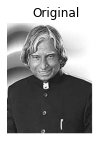

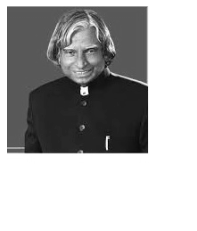

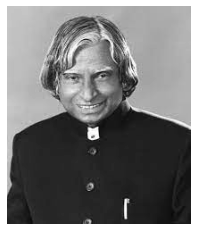

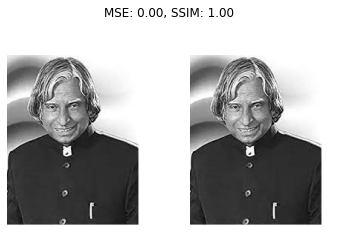

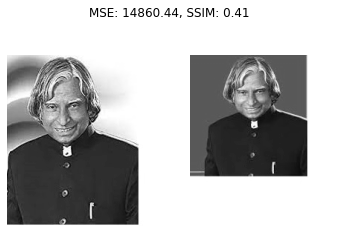

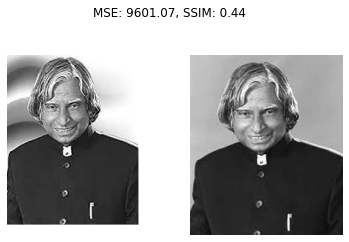

In [1]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
def mse(imageA, imageB):
# the 'Mean Squared Error' between the two images is the
# sum of the squared difference between the two images;
# NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

# return the MSE, the lower the error, the more "similar"
# the two images are
    return err
def compare_images(imageA, imageB, title):
 # compute the mean squared error and structural similarity
 # index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)
 # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
# show the images
    plt.show()
original = cv2.imread("kalam3re.jpg")
contrast = cv2.imread("kalam2re.jpg")
shopped = cv2.imread("kalam1.jpg")
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Contrast", contrast), ("Photoshopped", shopped)
# loop over the images
for (i, (name, image)) in enumerate(images):
# show the image
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")
# show the figure
    plt.show()
# compare the images
compare_images(original, original, "Original vs. Original")
compare_images(original, contrast, "Original vs. Contrast")
compare_images(original, shopped, "Original vs. Photoshopped")